# Random Behavior

In [1]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

## Lecture 1 - Wiener Process Simulation

In [2]:
def wiener_process(dt=0.1, x0=0.0, n=1000) -> tuple[np.ndarray, np.ndarray]:
    """
    Wiener Process Simulation
    Args:
        dt: is change in time
        x0: is initial value
        n: is number of samples
    """

    # initialize W(t) with all zeros
    W = np.zeros(n+1)
    # create the time steps
    t = np.linspace(x0, n, n+1)

    # every new step is drawn from normal dist with N(0,dt)
    # where N(0,dt) = sqrt(dt)*N(0,1)
    W[1:n+1] = np.cumsum(
        npr.normal(0, np.sqrt(dt), n)
    )

    return t, W


def plot_wiener_process(t: np.ndarray, W: np.ndarray):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [5, 1]})
    fig.suptitle("Wiener Process Simulation", y=1.01)
    ax = ax.flatten()
    ax[0].grid(alpha=0.33)
    ax[0].axhline(c="k", lw=0.5)
    ax[0].plot(t, W)
    ax[0].set(xlabel="Time (t)", ylabel="Wiener Process W(t)", title="Wiener Process")
    ax[1].hist(W, bins=25, orientation="horizontal", density=True)
    ax[1].grid(alpha=0.33, axis="y")
    ax[1].set(xlabel="Freq", title="Histogram")

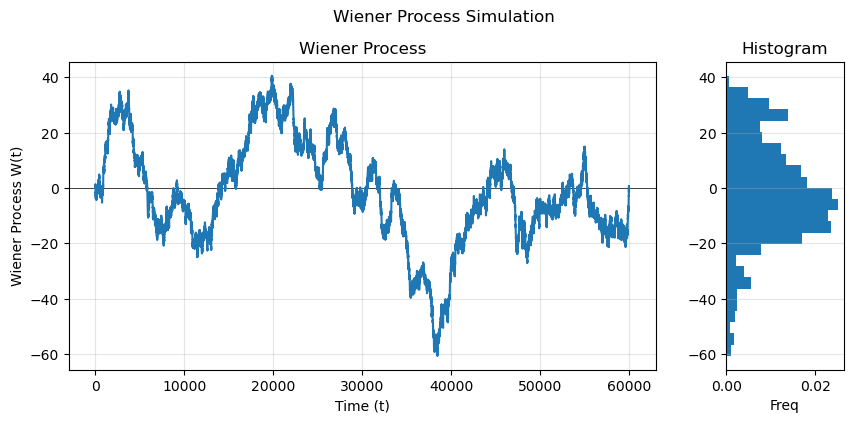

In [3]:
npr.seed(42)
time, data = wiener_process(n=60_000)
plot_wiener_process(time, data)

## Lecture 2 - Geometric Brownian Motion

In [4]:
def simulate_geometric_random_walk(S0=10, T=2, N=1000, mu=0.1, sigma=0.05)-> tuple[np.ndarray, np.ndarray]:
    # single timestep
    dt = T/N
    # all timesteps
    t = np.linspace(0, T, N)
    # wiener process ~ N(0,1)
    W = npr.standard_normal(size=N)
    W = np.cumsum(W) + np.sqrt(dt)
    # geometric random walk from lecture
    S = (mu - 0.5 * sigma ** 2) * t * sigma * W
    S = S0 * np.exp(S)
    return t, S


def plot_brownian_process(t: np.ndarray, S: np.ndarray):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.grid(alpha=0.33)
    ax.axhline(c="k", lw=0.5)
    ax.plot(t, S)
    ax.set(xlabel="Time (t)", ylabel="Stock Price S(t)", title="Geometric Random Walk Simulation")

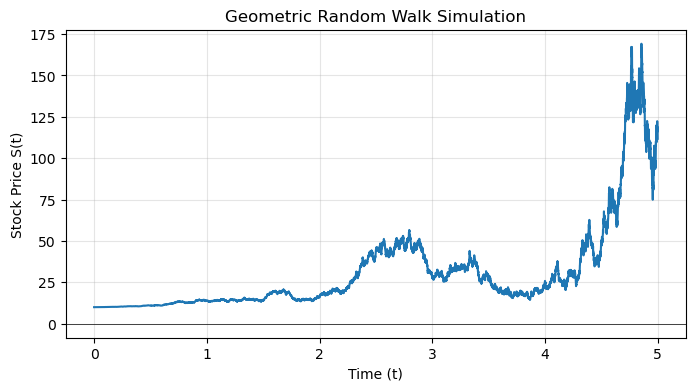

In [5]:
npr.seed(1)
time, data = simulate_geometric_random_walk(S0=10, T=5, N=10_000)
plot_brownian_process(time, data)